# <b>Section 1: Data Exploration</b>

### <b><u>Step 1</u>: Import library</b>

##### These are the main libraries used for data exploration:
- `numpy`: used for mathematical operations on matrices
- `pandas`: used to store data from .csv/.tsv files and operate functions on DataFrame
- `matplotlib`: used to visualize data

In [34]:
import sys  
sys.path.insert(0, '../../data')
sys.path.insert(0, '../../data/description')

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

### <b><u>Step 2</u>: Import songs data from 'songs_data.csv' file</b>

First, let's read the Spotify's songs data from `songs_data.tsv` file by using pandas.

In [36]:
songs_df_raw = pd.read_csv('../../data/songs_data.tsv', sep='\t')

### <b><u>Step 3</u>: Remove duplicate rows in the raw data</b>

Next, let's check whether the DataFrame has duplicate rows that needs to be removed.

In [37]:
duplicated_rows = songs_df_raw.duplicated().sum()
duplicated_rows

0

So there are 0 rows that are duplicated, which means each row in the DataFrame is unique.

But if there are any duplicate rows, we need to drop those 35 rows and see some of the first rows of the dataset.

In [38]:
songs_df = songs_df_raw.drop_duplicates()
songs_df.head()

,id,name,artist,genres,artist_followers,artist_popularity,markets,album,released_date,album_popularity,duration,explicit,popularity
0,1RDvyOk4WtPCtoqciJwVn8,Dreamers [Music from the FIFA World Cup Qatar ...,"Jung Kook,BTS,FIFA Sound","k-pop boy group,k-pop","5382641,58715441,167875","80,92,77",183,Dreamers [Music from the FIFA World Cup Qatar ...,2022-11-20,81,201391,False,92
1,6A1IbMKwjvXibcrU1sdqKH,Em Là,"MONO,Onionn",NaN,"100123,2809","54,55",182,22,2022-08-18,60,197333,False,62
2,7bFFUPBiF15n8m8RziqS4o,dự báo thời tiết hôm nay mưa,GREY D,v-pop,39690,56,182,dự báo thời tiết hôm nay mưa – Maxi Single,2022-11-22,52,281493,False,62
3,4QjxvzEFwb63NZ1pp3wvHy,Chết Trong Em,Thịnh Suy,"vietnamese singer-songwriter,v-pop",359817,54,183,Chết Trong Em,2022-10-31,50,256663,False,62
4,5p8ThxM2OhJ0igfxkz0Z1q,Wild Flower (with youjeen),RM,k-rap,12005881,81,183,Indigo,2022-12-02,85,273499,False,88


### <b><u>Step 4</u>: Explore the dataset</b>

In this next step, we will explore the features of the dataset. First, let's check how many rows and columns in the DataFrame.

In [39]:
num_rows, num_cols = songs_df.shape
num_rows, num_cols

(3000, 13)

There are 2965 rows and 13 columns in total.

Next, we need to know what are the columns of the DataFrame and check whether we need to remove any of them.

In [40]:
columns = songs_df.columns
columns

Index(['id', 'name', 'artist', 'genres', 'artist_followers',
       'artist_popularity', 'markets', 'album', 'released_date',
       'album_popularity', 'duration', 'explicit', 'popularity'],
      dtype='object')

To discover the meaning of each column, we can load data from `songs_data_des.csv` file

In [41]:
songs_des_df = pd.read_csv('../../data/description/songs_data_des.csv', on_bad_lines='skip')
songs_des_df

,column name,data type,meaning,example
0,id,string,The Spotify ID of track,3nqQXoyQOWXiESFLlDF1hG
1,name,string,The name of the track,Unholy (feat. Kim Petras)
2,artist,string,The artist(s) of the track,Sam Smith.Kim Petras
3,genres,string,The genres of that artist(s),uk pop.transpop.pop.dance pop
4,artist_followers,string,The number of followers of the artist(s),20747240.825245
5,artist_popularity,string,"""The popularity of the artist(s). The value w...",87.82
6,markets,int,The number of countries which the track is av...,182
7,album,string,The album of the track,Unholy (feat. Kim Petras)
8,released_date,string,The released date of the track,2022-09-22
9,album_popularity,int,"""The popularity of the album.""",88


At the moment, we don't really need to use the feature `explicit` for data exploration. So we will decide to drop it for now.

In [42]:
songs_df.drop('explicit', inplace=True, axis=1, errors='ignore')

Next, we need to recheck the data types of each column.

In [43]:
dtypes = songs_df.dtypes
dtypes

id                   object
name                 object
artist               object
genres               object
artist_followers     object
artist_popularity    object
markets               int64
album                object
released_date        object
album_popularity      int64
duration              int64
popularity            int64
dtype: object

As we can see, there are only 4 numeric categories: `markets`, `album_popularity`, `duration` and `popularity`. The rest of the columns are either string or list types but in DataFrame, string and list are categorized as object.

Let's get the detailed info and number of non-null values of each column.

In [44]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 3000 non-null   object
 1   name               3000 non-null   object
 2   artist             3000 non-null   object
 3   genres             2811 non-null   object
 4   artist_followers   3000 non-null   object
 5   artist_popularity  3000 non-null   object
 6   markets            3000 non-null   int64 
 7   album              3000 non-null   object
 8   released_date      3000 non-null   object
 9   album_popularity   3000 non-null   int64 
 10  duration           3000 non-null   int64 
 11  popularity         3000 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 304.7+ KB


We can notice that there are some null values in genres column, therefore, we need to explore how many values are missing in each column of the dataset.

In [45]:
null_cols = songs_df.isnull().sum()
null_cols

id                     0
name                   0
artist                 0
genres               189
artist_followers       0
artist_popularity      0
markets                0
album                  0
released_date          0
album_popularity       0
duration               0
popularity             0
dtype: int64

So there are 189 missing values in the `genres` column, the other columns in the DataFrame does not have any null values. 

As for now, we will move on to the data preprocessing step to clean and normalize all the data.

### <b><u>Step 6</u>: Preprocessing the dataset</b>

##### Calculate missing ratio, num_diff_vals and diff_vals of numerical and categorical columns

In this part, we need to explore values in categorical columns. 

We build some help functions below to calculate the missing ratio of values in the columns (in percentage), calculate number of different values and the list of different values.

In [46]:
def missing_ratio(c):
    return c.isnull().sum() / c.__len__() * 100

def num_diff_vals(c):
    if c.all() == songs_df['genres'].all() or c.all() == songs_df['artist'].all():
        return c.str.split(',').explode().nunique()
    return c.nunique(dropna=True)

def diff_vals(c):
    if c.all() == songs_df['genres'].all() or c.all() == songs_df['artist'].all():
        return c.str.split(',').explode().value_counts().keys().to_list()
    return c.dropna().unique()

For categorical columns, we need to specify what is the missing ratio, number of unique values and list all of the unique values. There are 3 categorical columns in the dataset: `genres`, `artist` and `album`.

In [47]:
categorical_cols_des = songs_df[['genres', 'artist', 'album']].agg([missing_ratio, num_diff_vals, diff_vals])
categorical_cols_des

,genres,artist,album
missing_ratio,6.3,0.0,0.0
num_diff_vals,434,1542,2073
diff_vals,"[pop, v-pop, dance pop, vietnamese hip hop, uk...","[Ed Sheeran, Justin Bieber, David Guetta, Tayl...","[Winter Blues 2023, Winter Vibes 2023, Indigo,..."


From the insights, we could see that genres column has a missing ratio of 6.3% in total. Furthermore, there are 434 unique genres in the whole dataset.

Hence, there are 1542 unique artists and 2073 unique albums in total from the DataFrame. These are very important numbers that we can use to analyze.

##### 1. Genres

First we will need to preprocess data in `genres` column since it has null values. Each data in `genres` column is a string of genre(s) seperated by a comma (`,`). 

Therefore, we need to convert the string data into a list of genres, then fill all of the null values with `None`.

In [48]:
songs_df['genres'] = songs_df['genres'].str.split(',')
songs_df['genres'].fillna('None', inplace=True)

Next, we will add another column called `main_genre` to the DataFrame, since we think it might be useful for data modeling.

We take the first genre that appeared in the list to be the main genre.

In [49]:
songs_df['main_genre'] = songs_df['genres'].apply(lambda x: x[0] if type(x) == list else x)

##### 2. Artists

Let's move on to the `artist` column. Each data in this column is also a string of artist(s) separated by a comma. 

So we also need to convert string data into a list.

In [50]:
songs_df['artist'] = songs_df['artist'].str.split(',')

We found it also might be interesting that we add another column called `artists_count` into the DataFrame, it can be used to answer some meaningful questions.

In [51]:
songs_df['artists_count'] = songs_df['artist'].apply(len)

##### 3. Released date

We have a datetime datatype column in the DataFrame, which is the released date of the track. Therefore, we need to convert string data into datetime by using `to_datetime` function in pandas.

In [52]:
songs_df['released_date'] = pd.to_datetime(songs_df['released_date'], format='%Y-%m-%d', errors='coerce')

##### Calculate missing ratio, min and max values of numerical columns

Now we can explore the missing ratio, min and max values in numerical colums.

There are 5 numerical columns in total, including: `markets`, `album_popularity`, `duration`, `popularity` and `artists_count`. Let's explore missing ratio, min value and max value of these columns.

In [53]:
numeric_cols_des = songs_df[songs_df.describe().columns].agg([missing_ratio, min, max])
numeric_cols_des

,markets,album_popularity,duration,popularity,artists_count
missing_ratio,0.0,0.0,0.0,0.0,0.0
min,1.0,0.0,51913.0,0.0,1.0
max,184.0,95.0,613026.0,100.0,10.0


There are some noticeable values which is:
- 1 is the minimum value of markets that a songs is available.
- The shortest song duration is 51913 ms ~ 52 seconds!
- 10 is the maximum value of the number of artists involved in a song!
- The highest album popularity score is 95, whereas highest song popularity score is 100!

<BarContainer object of 3 artists>

<Figure size 1000x2000 with 0 Axes>

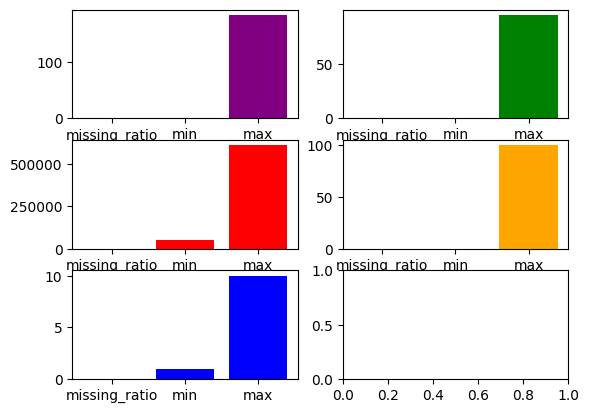

In [67]:
plt.figure(figsize=(10, 20))
_, ax = plt.subplots(3, 2)
ax[0, 0].bar(numeric_cols_des.index, numeric_cols_des['markets'], color = 'purple')
ax[0, 1].bar(numeric_cols_des.index, numeric_cols_des['album_popularity'], color = 'g')
ax[1, 0].bar(numeric_cols_des.index, numeric_cols_des['duration'], color = 'r')
ax[1, 1].bar(numeric_cols_des.index, numeric_cols_des['popularity'], color = 'orange')
ax[2, 0].bar(numeric_cols_des.index, numeric_cols_des['artists_count'], color = 'b')

For easy visualization, let's plot the description table into bar charts.
- `markets`: purple chart
- `album_popularity`: green chart
- `duration`: red chart
- `popularity`: orange chart
- `artists_count`: blue chart

### <b><u>Step 6</u>: Normalizing columns in the dataset</b>

##### 1. Artist followers

Each data in `artist_followers` column is a string of followers of respective artist(s) separated by a comma.

Therefore, we need to convert string data to a list and convert each number of followers from string to int.

In [55]:
songs_df['artist_followers'].update(songs_df['artist_followers'].str.split(','))
songs_df['artist_followers'].update(songs_df['artist_followers'].apply(lambda x: list(map(int, x))))

Next step, since we want to represent the artists' followers as a specific value only, let's normalize the list of followers into 1 number by calculating the vectorized length of the elements in the list.

In [56]:
songs_df['artist_followers'] = songs_df['artist_followers'].apply(lambda x: np.sqrt(np.sum(list(map(lambda y: y**2, x)))))
songs_df['artist_followers'] = songs_df['artist_followers'].astype('int64')

##### 2. Artist popularity

`artist_popularity` column has the same feature as `artist_followers`. So we also need to convert each data from string to list and then map all the values from string to numbers.

In [57]:
songs_df['artist_popularity'].update(songs_df['artist_popularity'].str.split(','))
songs_df['artist_popularity'].update(songs_df['artist_popularity'].apply(lambda x: list(map(int, x))))

Furthermore, we also want to represent the artists' popularity by 1 number only, therefore, let's calculate the vectorized length of each element in the list of each data.

In [58]:
songs_df['artist_popularity'] = songs_df['artist_popularity'].apply(lambda x: min(100, np.sqrt(np.sum(list(map(lambda y: y**2, x))))))
songs_df['artist_popularity'] = songs_df['artist_popularity'].astype('int64')

### <b><u> Step 7</u>: Ask some meaningful questions about the data</b>

##### Question 1: What are the top 10 most popular genres and visualize the number of songs each genre is involved in.

<AxesSubplot: >

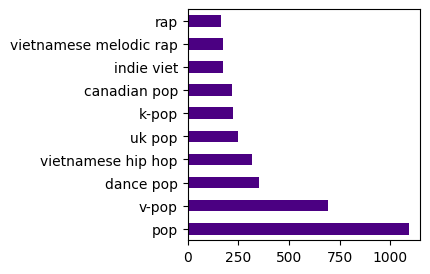

In [59]:
songs_df['genres'].str.join(',').str.split(',').explode().value_counts().drop(['N', 'o', 'n', 'e']) \
                .nlargest(n=10).plot.barh(figsize=(3,3), color='indigo')

insights

##### Question 2: What are the top 10 most popular artists and visualize the number of songs each artist is involved in.

<AxesSubplot: >

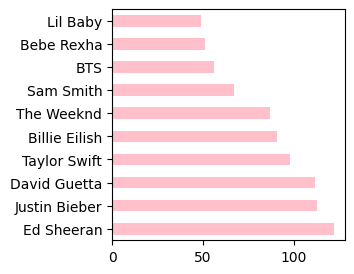

In [60]:
songs_df['artist'].str.join(',').str.split(',').explode().value_counts() \
                .nlargest(n=10).plot.barh(figsize=(3,3), color='pink')

insights

##### Question 3: What are the top 10 most popular albums and visualize the number of songs mentioned in each album.

<AxesSubplot: >

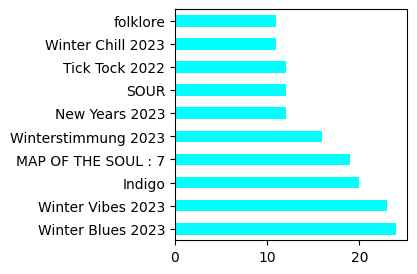

In [61]:
songs_df['album'].value_counts().nlargest(n=10).plot.barh(figsize=(3,3), color='cyan')

insights

##### Question 4: For each song popularity value, visualize the number of songs.

<AxesSubplot: >

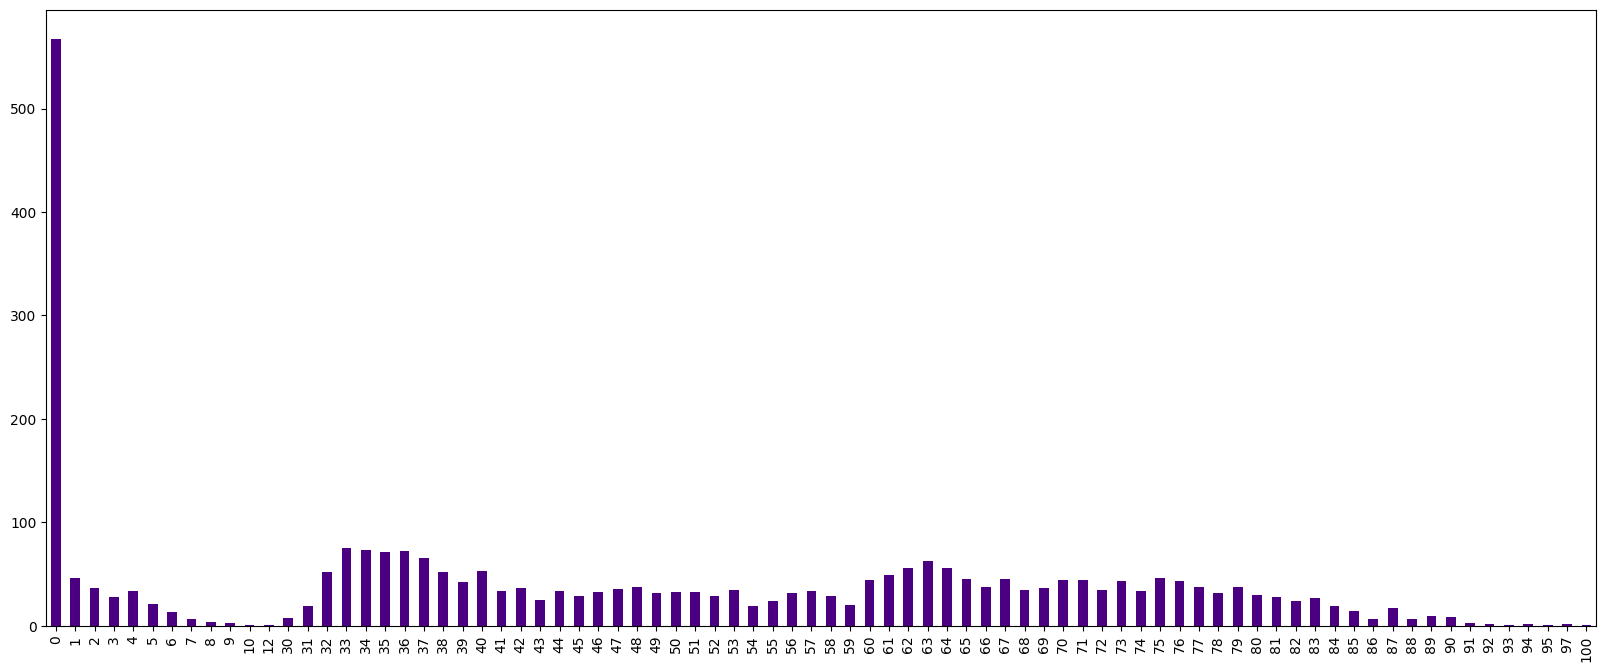

In [62]:
songs_df['popularity'].value_counts().sort_index(ascending=True) \
                    .plot.bar(figsize=(20, 8), color='indigo')

insights

##### Question 5: List all the years the songs are released in the dataset and visualize the number of songs in each year.

<AxesSubplot: >

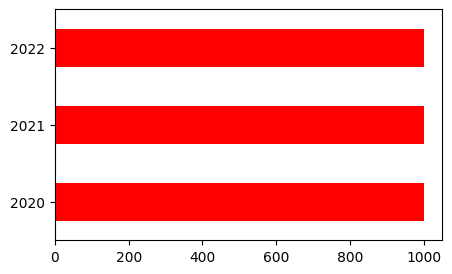

In [69]:
songs_df['released_date'].dt.year.value_counts().sort_index(ascending=True) \
                        .plot.barh(figsize=(5, 3), color='red')

insights

##### Question 6: What are the top 5 most popular artists from 2020 to 2022.

In [64]:
songs_df[songs_df['released_date'].dt.year.between(2020, 2022)]['artist'].explode().value_counts().nlargest(n=5).index.to_list()

['Ed Sheeran',
 'Justin Bieber',
 'David Guetta',
 'Taylor Swift',
 'Billie Eilish']

insights

### <b><u>Step 7</u>: Generate DataFrame used for model training</b>

In [65]:
songs_model_df = songs_df[['artist_followers', 'artist_popularity', 'markets', 'album_popularity', 'duration', 'artists_count', 'popularity']]
songs_model_df

,artist_followers,artist_popularity,markets,album_popularity,duration,artists_count,popularity
0,58961886,100,183,81,201391,3,92
1,100162,77,182,60,197333,2,62
2,39690,56,182,52,281493,1,62
3,359817,54,183,50,256663,1,62
4,12005881,81,183,85,273499,1,88
...,...,...,...,...,...,...,...
2995,6534881,70,184,50,166837,1,60
2996,1902185,68,184,48,212343,1,60
2997,406126,72,184,61,210142,1,60
2998,5033038,79,184,48,172600,1,60


For the next step, let's calculate the correlation of the model DataFrame and predict which features are affected most to each other.

In [66]:
songs_model_df.corr(method='spearman')

,artist_followers,artist_popularity,markets,album_popularity,duration,artists_count,popularity
artist_followers,1.000000,0.838066,-0.551813,-0.154667,-0.083046,-0.038525,-0.190041
artist_popularity,0.838066,1.000000,-0.490837,-0.065923,-0.207180,0.303502,-0.077646
markets,-0.551813,-0.490837,1.000000,0.422590,0.075402,0.079161,0.435947
album_popularity,-0.154667,-0.065923,0.422590,1.000000,-0.137885,-0.046498,0.974226
duration,-0.083046,-0.207180,0.075402,-0.137885,1.000000,-0.054042,-0.162949
artists_count,-0.038525,0.303502,0.079161,-0.046498,-0.054042,1.000000,-0.028571
popularity,-0.190041,-0.077646,0.435947,0.974226,-0.162949,-0.028571,1.000000


insights